<a href="https://colab.research.google.com/github/revanth7667/STAT-663_Codes/blob/main/Notebooks/ResNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install datasets

In [ ]:
%%capture

#Importing the Required Pacakges and Libraries

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Dataset
from datasets import load_dataset

#tensorflow
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import preprocess_input

#other
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
#loading the Dataset and viewing it's structure
dataset = load_dataset("cifar10")
dataset

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [ ]:
#Viewing Sample Image from Training Data
element = next(iter(dataset['train']))

Text(0.5, 1.0, '0')

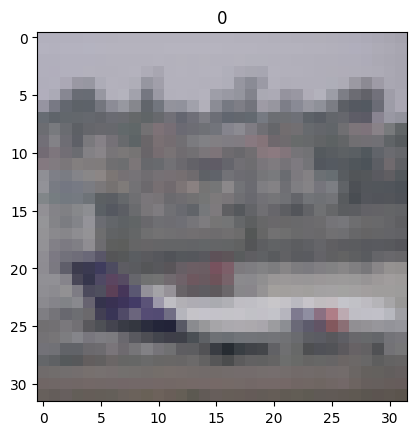

In [ ]:
plt.imshow(element['img'])
plt.title(element['label'])

## Raw Models

In [ ]:
element = next(iter(dataset['train']))
X_train = []
y_train = []
for i in range(50,000):
  X_train.append(element['img'])
  y_train.append(element['label'])


In [ ]:
X_train

[]

### Decision Trees

In [ ]:
#Trainig Model with Train Data
model_rf_raw = RandomForestClassifier(n_estimators=100)

elems = iter(dataset['train'])

model_rf_raw.fit(elems['img'], elems['label'])

TypeError: 'generator' object is not subscriptable

In [ ]:
dataset['train'].features['img']

Image(decode=True, id=None)

In [ ]:
# Load a pretrained model
model = tf.keras.applications.resnet50.ResNet50(
  include_top=False, # take any input shape, not just 224x224
  weights='imagenet', # use the imagenet pretrained model
  pooling='avg' # use global average pooling to get a 2048 vector from our image
)

# Run one example image
processed_image = np.array(element['img'])[None, ...]/255.0
embedding = model.predict(processed_image)

1/1 [==============================] - 2s 2s/step


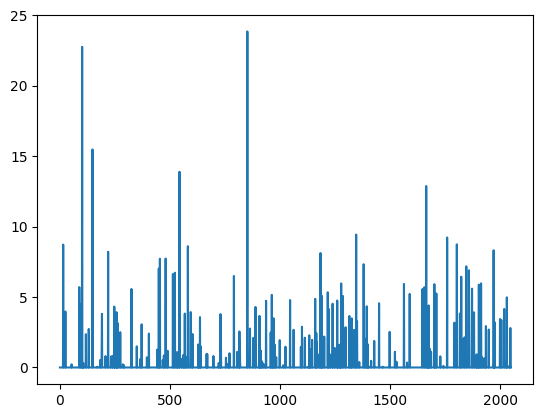

In [ ]:
# Visualize embedding
plt.plot(embedding[0])

In [ ]:
# @title Lab work
# Loop over the remaining CIFAR10 dataset to produce 2048 embeddings of the image
# Use a logistic regression or random foreset to try and classify these features as before
# Try to use batching to speed up the generation of your features, what is batching?
# Steps:
# 1. Your input data is a 32x32x3 image. You have 50,000 images total so your input dimension is
#    50000 x (32 x 32 x 3). Or 50000 rows and 3072 (which is (32 x 32 x 3)) pixels.
#    Previously we use pixels as features of or Logistic Regression and Random Forest
# 2. The ResNet50 model transforms our pixels into "2048" feature embedding so now it is
#    50000 rows and 2048 columns of "features"
# 3. Use these new features to train a simple logistic regression and random forest model as we did in the scikit learn example
#    https://colab.research.google.com/drive/1KUperg8lvb3gYBPzP6sbZd89Ft8rDbYG#scrollTo=_bAd38A0N73w

In [ ]:
#Importing The Required Packages and Libraries

#Sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



In [ ]:
dataset['train'][0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 'label': 0}

In [ ]:
#training Logistic Regression on the dataset
